<a href="https://colab.research.google.com/github/juanBRmecatronica/curso_IA/blob/main/primer_corte_parcial_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import make_regression   #datos en funcion lineal

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA/archivos datos/parcial.csv')

primero revisamos un fragmento de los datos que tenemos

In [ ]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

podemos ver una gran cantidad de datos, de ubicacion , fecha, predicciones del clima clima etc

obserbamos que hay datos tipo objeto como lo son la diereccion del viento, la fecha el sitio, ademas datos como Evaporation y sunshine que estan mayormente vacios lo cual puede afectar los calculos. este tipo de datos los quitaremos de la tabla ya que no sirven para realizar un analisis  

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
df.Sunshine.unique()

array([ nan, 12.3, 13. , 13.3, 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7,
       12.1, 10.3, 13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4,
       13.4, 13.6,  7.4, 10. ,  2.3,  6.6,  0.3, 10.7, 11.6, 10.2,  9. ,
       12. ,  3. ,  7.9, 11.5, 11.2,  4.8,  5.8,  6. , 11.1, 11.8, 11.4,
       10.8,  7.8, 11. ,  5.5,  4.7,  4.2,  4.4,  6.2,  9.8,  9.9,  4.3,
        8. ,  9.6, 10.4,  9.3,  8.7,  7.6,  7.5, 10.1,  6.3,  2.8,  0.7,
        9.4,  9.7,  0.6,  5.1,  8.3,  4.1,  3.9,  6.8,  8.6,  2.7,  8.2,
        3.1,  1.8,  0.1,  0.8,  3.4,  7.1,  5. ,  5.7,  6.1,  7. ,  2.9,
        2.5,  4.6,  8.9,  9.1,  1.7,  8.1,  9.5,  1.2,  1.4,  8.8,  2.2,
        3.5,  9.2,  1.9, 11.7, 11.9,  7.7,  0.9, 12.5,  2.1, 12.8, 13.7,
        8.5,  0.2,  4. ,  2.4,  5.2,  0.5,  6.4,  4.5,  1.1,  2. ,  0.4,
        1.5,  3.3,  6.5,  2.6,  3.8,  3.6,  3.2,  6.7,  5.4,  7.2,  4.9,
        1. ,  1.6,  5.3,  7.3,  5.6,  1.3, 13.8, 13.5, 14. , 13.9, 14.1,
       14.5, 14.3, 14.2])

In [ ]:
df.Sunshine.isnull().sum()

69835

In [ ]:
df.Sunshine.value_counts()

Sunshine
0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: count, Length: 145, dtype: int64

como vemos Sunshine de  las 145460 filas existentes tiene 69835 vacias, que es casi la mitad, lo cual nos afecta mucho la medida, porlocual eliminaremos esta columna.

In [ ]:
df.Evaporation.unique()

array([     nan, 1.20e+01, 1.48e+01, 1.26e+01, 1.08e+01, 1.14e+01,
       1.12e+01, 1.30e+01, 9.80e+00, 1.46e+01, 1.10e+01, 1.28e+01,
       1.38e+01, 1.64e+01, 1.74e+01, 1.60e+01, 1.36e+01, 8.00e+00,
       8.20e+00, 8.60e+00, 1.42e+01, 1.58e+01, 1.62e+01, 1.34e+01,
       1.44e+01, 1.18e+01, 1.56e+01, 1.52e+01, 1.16e+01, 9.60e+00,
       6.60e+00, 6.00e-01, 6.00e+00, 3.00e+00, 2.00e+00, 5.20e+00,
       9.00e+00, 1.02e+01, 1.00e+01, 7.40e+00, 8.40e+00, 9.20e+00,
       9.40e+00, 1.24e+01, 1.04e+01, 7.20e+00, 6.80e+00, 7.60e+00,
       4.40e+00, 6.40e+00, 7.80e+00, 7.00e+00, 8.80e+00, 6.20e+00,
       5.80e+00, 2.00e-01, 2.40e+00, 1.80e+00, 2.20e+00, 2.80e+00,
       5.00e+00, 5.60e+00, 4.80e+00, 4.20e+00, 4.00e+00, 3.20e+00,
       4.60e+00, 3.40e+00, 3.60e+00, 0.00e+00, 1.40e+00, 3.80e+00,
       8.00e-01, 2.60e+00, 1.60e+00, 1.20e+00, 1.00e+00, 5.40e+00,
       1.06e+01, 1.68e+01, 1.70e+01, 2.02e+01, 1.40e+01, 1.72e+01,
       1.22e+01, 1.50e+01, 1.82e+01, 1.32e+01, 4.10e+00, 1.70e

In [ ]:
df.Evaporation.isnull().sum()

62790

obserbamos que Evaporation tambien tiene una gran cantidad de datos vacios, por lo que tambien propongo eliminarla

In [ ]:

df2 = df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','Sunshine','Evaporation'], axis=1)
df2

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145455      2.8     23.4       0.0           31.0          13.0          11.0   
145456      3.6     25.3       0.0           22.0          13.0           9.0   
145457      5.4     26.9       0.0           37.0           9.0           9.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   
145459     14.9      NaN       0.0            NaN          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
145455         51.0         24.0       1024.6       1020.3       NaN   
145456         56.0         21.0       1023.5       1019.1       NaN   
145457         53.0         24.0       1021.0       1016.8       NaN   
145458         51.0         24.0       1019.4       1016.5       3.0   
145459         62.0         36.0       1020.2       1017.9       8.0   

        Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0            NaN     16.9     21.8        No           No  
1            NaN     17.2     24.3        No           No  
2            2.0     21.0     23.2        No           No  
3            NaN     18.1     26.5        No           No  
4            8.0     17.8     29.7        No           No  
...          ...      ...      ...       ...          ...  
145455       NaN     10.1     22.4        No           No  
145456       NaN     10.9     24.5        No           No  
145457       NaN     12.5     26.1        No           No  
145458       2.0     15.1     26.0        No           No  
145459       8.0     15.0     20.9        No          NaN  

[145460 rows x 16 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustSpeed  135197 non-null  float64
 4   WindSpeed9am   143693 non-null  float64
 5   WindSpeed3pm   142398 non-null  float64
 6   Humidity9am    142806 non-null  float64
 7   Humidity3pm    140953 non-null  float64
 8   Pressure9am    130395 non-null  float64
 9   Pressure3pm    130432 non-null  float64
 10  Cloud9am       89572 non-null   float64
 11  Cloud3pm       86102 non-null   float64
 12  Temp9am        143693 non-null  float64
 13  Temp3pm        141851 non-null  float64
 14  RainToday      142199 non-null  object 
 15  RainTomorrow   142193 non-null  object 
dtypes: float64(14), object(2)
memory usage: 17.8+ MB


ahora a los dato que nos interesan debemos tratarlos, por ejemplo encontrar cuales de ellos tienen valores nulos y eliminar esas filas, que no deben ser tantas como evaporation por ejemplo.

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73411 entries, 4 to 145458
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        73411 non-null  float64
 1   MaxTemp        73411 non-null  float64
 2   Rainfall       73411 non-null  float64
 3   WindGustSpeed  73411 non-null  float64
 4   WindSpeed9am   73411 non-null  float64
 5   WindSpeed3pm   73411 non-null  float64
 6   Humidity9am    73411 non-null  float64
 7   Humidity3pm    73411 non-null  float64
 8   Pressure9am    73411 non-null  float64
 9   Pressure3pm    73411 non-null  float64
 10  Cloud9am       73411 non-null  float64
 11  Cloud3pm       73411 non-null  float64
 12  Temp9am        73411 non-null  float64
 13  Temp3pm        73411 non-null  float64
 14  RainToday      73411 non-null  object 
 15  RainTomorrow   73411 non-null  object 
dtypes: float64(14), object(2)
memory usage: 9.5+ MB


ahora vamos a rreglar los dato de lluvia mañana  y lluvia hoy debino a que sus datos son estrings que literalmnte dicen si ó no

In [ ]:
Lluviahoy=np.where(df2['RainToday']=='No',0,1)
df2['RainToday']=Lluviahoy
df2.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
4      17.5     32.3       1.0           41.0           7.0          20.0   
11     15.9     21.7       2.2           31.0          15.0          13.0   
12     15.9     18.6      15.6           61.0          28.0          28.0   
16     14.1     20.9       0.0           22.0          11.0           9.0   
17     13.5     22.9      16.8           63.0           6.0          20.0   

    Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
4          82.0         33.0       1010.8       1006.0       7.0       8.0   
11         89.0         91.0       1010.5       1004.2       8.0       8.0   
12         76.0         93.0        994.3        993.0       8.0       8.0   
16         69.0         82.0       1012.2       1010.4       8.0       1.0   
17         80.0         65.0       1005.8       1002.2       8.0       1.0   

    Temp9am  Temp3pm  RainToday  RainTomorrow  
4      17.8     29.7          0             0  
11     15.9     17.0          1             1  
12     17.4     15.8          1             1  
16     17.2     18.1          0             1  
17     18.0     21.5          1             1

In [ ]:
df2.RainToday.nunique()

2

In [ ]:
lluviamañana=np.where(df2['RainTomorrow']=='No',0,1)
df2['RainTomorrow']=lluviamañana
df2.RainTomorrow

4         0
11        1
12        1
16        1
17        1
         ..
145428    0
145429    0
145432    0
145433    0
145458    0
Name: RainTomorrow, Length: 73411, dtype: int64

In [ ]:
df2.RainTomorrow.nunique()

2

In [ ]:
df2

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
4          17.5     32.3       1.0           41.0           7.0          20.0   
11         15.9     21.7       2.2           31.0          15.0          13.0   
12         15.9     18.6      15.6           61.0          28.0          28.0   
16         14.1     20.9       0.0           22.0          11.0           9.0   
17         13.5     22.9      16.8           63.0           6.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145428     14.6     26.3       0.0           37.0          19.0          20.0   
145429     14.3     27.6       0.4           39.0           0.0          20.0   
145432     12.7     22.2       0.0           37.0          19.0          13.0   
145433      9.4     22.7       0.0           35.0          13.0          17.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
4              82.0         33.0       1010.8       1006.0       7.0   
11             89.0         91.0       1010.5       1004.2       8.0   
12             76.0         93.0        994.3        993.0       8.0   
16             69.0         82.0       1012.2       1010.4       8.0   
17             80.0         65.0       1005.8       1002.2       8.0   
...             ...          ...          ...          ...       ...   
145428         61.0         36.0       1022.0       1018.6       7.0   
145429         68.0         27.0       1020.5       1016.1       4.0   
145432         59.0         34.0       1024.3       1021.7       8.0   
145433         62.0         32.0       1026.6       1023.6       8.0   
145458         51.0         24.0       1019.4       1016.5       3.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
4            8.0     17.8     29.7          0             0  
11           8.0     15.9     17.0          0             0  
12           8.0     17.4     15.8          0             0  
16           1.0     17.2     18.1          0             0  
17           1.0     18.0     21.5          0             0  
...          ...      ...      ...        ...           ...  
145428       1.0     15.4     25.0          0             0  
145429       7.0     16.1     27.2          0             0  
145432       8.0     13.9     21.0          0             0  
145433       4.0     11.8     22.3          0             0  
145458       2.0     15.1     26.0          0             0  

[73411 rows x 16 columns]

<Axes: >

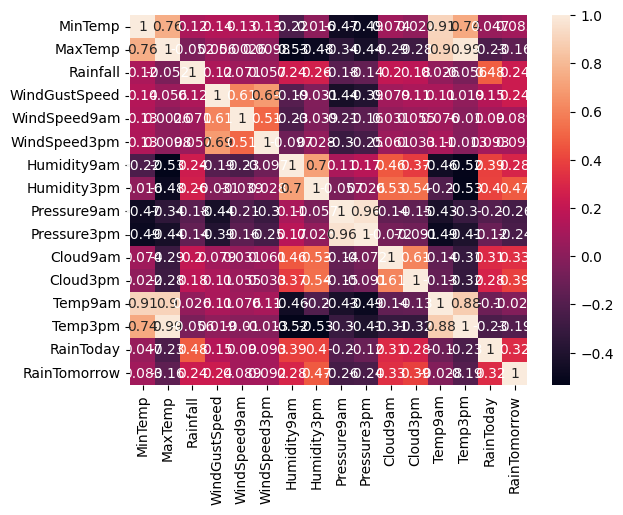

In [ ]:
coor_matriz=df2.corr()
sns.heatmap(data=coor_matriz,annot=True)

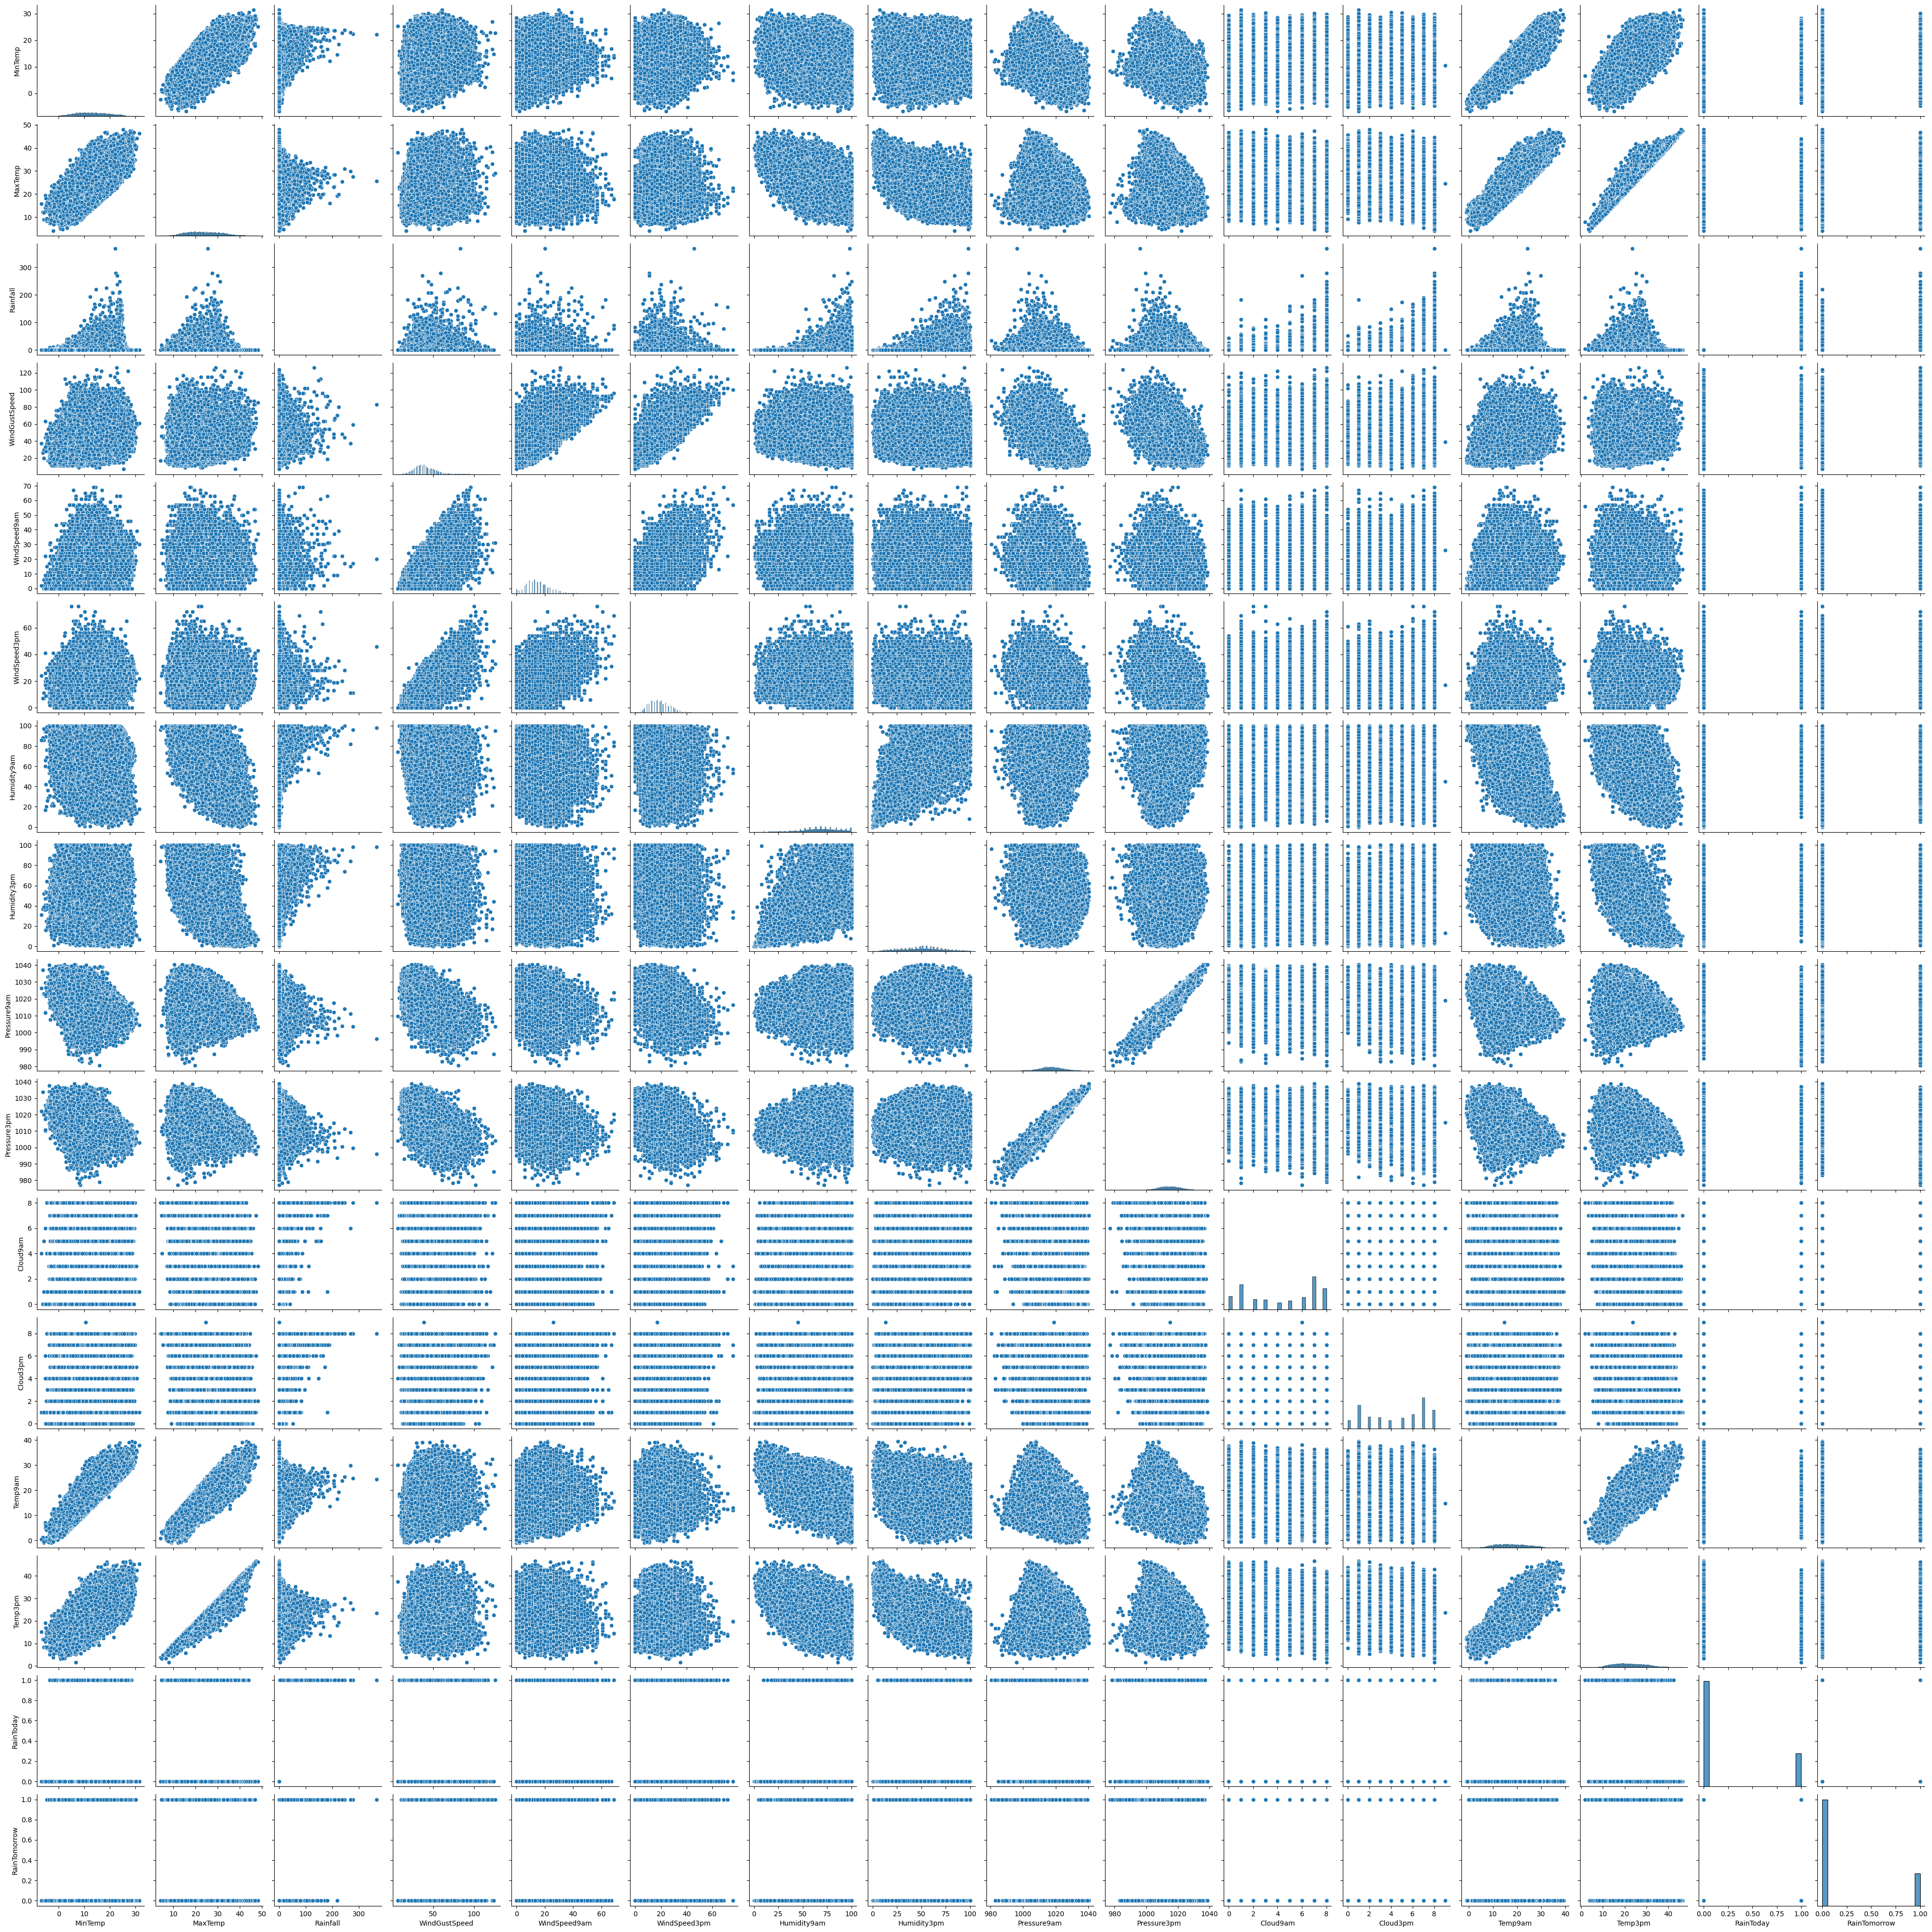

In [ ]:
sns.pairplot(df2)

como se obserba el la grafica MinTmp tiene una gran correlacion positiva con Max temp , ademas son un gran candidato para realizar una clasificacion, teneindo como variable bjetivo rain tomorrow

In [ ]:
X = df2[['MinTemp', 'MaxTemp']]
y = df2['RainTomorrow']

In [ ]:
df2.RainTomorrow.nunique()

2

In [ ]:
y.nunique()

2

vamoas a separar los datos en conjuntos de entrenamiento y prueba:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#------------------new--------------------------#
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((58728, 2), (14683, 2), (58728,), (14683,))

ahora entrenamos el modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

79762     0
86798     0
86877     0
67166     0
130234    1
         ..
37133     0
99701     1
33668     1
60797     0
72753     1
Name: RainTomorrow, Length: 14683, dtype: int64

In [ ]:
a=y_test - y_predict
a

79762     0
86798     0
86877     0
67166     0
130234    1
         ..
37133     0
99701     1
33668     1
60797     0
72753     1
Name: RainTomorrow, Length: 14683, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
matrixConfu=confusion_matrix(y_test,y_predict)

In [ ]:
def y_heatConfu(datos):
  g= sns.heatmap(datos, annot = True,
                 xticklabels =['clasese 0' ,'calse 1'],
                 yticklabels =['clasese 0' ,'calse 1'],
                 cbar= False, cmap = "Purples")
  g.set_title("matris de  confusión")

In [ ]:
N,P = matrixConfu
fn= N[1]
fp= P[0]
((fn+fp)/len(y_test))*100

21.60321460192059

In [ ]:
matrixConfu

array([[10908,   330],
       [ 2842,   603]])

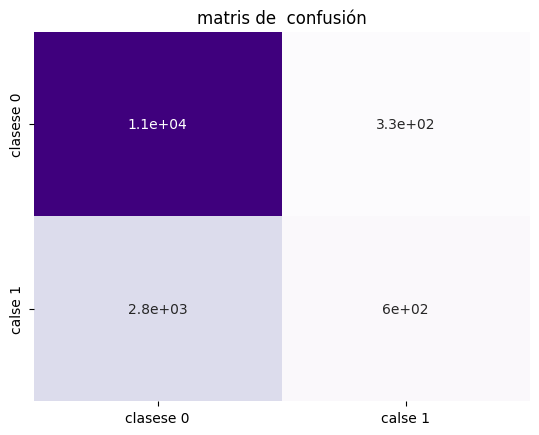

In [ ]:
y_heatConfu(matrixConfu)

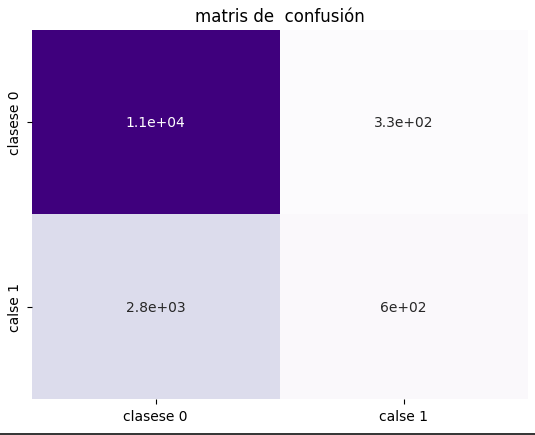

tener en cuenta que la clase cero deberia ser que en la prediccion del clima mañana no lloviera y la clase 1 que si llovera.

acontinuacion sacaremos el porcentaje de acierto de cada clase.

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
total_clase_0 = tn + fp
porcentaje_clase_0_correctos = (tn / total_clase_0) * 100 if total_clase_0 > 0 else 0
print(f"Porcentaje de datos clase 0 correctamente clasificados: {porcentaje_clase_0_correctos:.2f}%")


Porcentaje de datos clase 0 correctamente clasificados: 97.06%



obsebamos que acertó que no lloveria en la predicion de 11000  datos y que predijo de forma correcta que mañana lloveria en 600 datos.

si observamos por un lado los falsos positivos tenemos que erró 330 datos, y los flasos negativosfueron 2800

viendo con esto que clasifica mejor el "mañana no llovera " que el "si lloverá" siendo que del total de datos clase cero que existian clasificó crrectamnet el 97% de ellos encambio solo acerto el 17.5% de los clase 1.

si nos preguntamos el porqué, pueden haber varias razones la mas importante es que analizamos todos los datos de max temp y min temp por igual siendo que habian datos para varias ciudades, esto afecta en medida a la diferencia climatica entre ciudad y ciudad



In [ ]:

total_clase_1 = fn + tp
porcentaje_clase_1_correctos = (tp / total_clase_1) * 100 if total_clase_1 > 0 else 0
print(f"Porcentaje de datos clase 1 correctamente clasificados: {porcentaje_clase_1_correctos:.2f}%")


Porcentaje de datos clase 1 correctamente clasificados: 17.50%


ahora vamos a filtrar el data frame por todos los datos pertenecientes a Albury

In [ ]:
df3= df.drop(['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm','Sunshine','Evaporation'], axis=1)
df3

Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0        Albury     13.4     22.9       0.6           44.0          20.0   
1        Albury      7.4     25.1       0.0           44.0           4.0   
2        Albury     12.9     25.7       0.0           46.0          19.0   
3        Albury      9.2     28.0       0.0           24.0          11.0   
4        Albury     17.5     32.3       1.0           41.0           7.0   
...         ...      ...      ...       ...            ...           ...   
145455    Uluru      2.8     23.4       0.0           31.0          13.0   
145456    Uluru      3.6     25.3       0.0           22.0          13.0   
145457    Uluru      5.4     26.9       0.0           37.0           9.0   
145458    Uluru      7.8     27.0       0.0           28.0          13.0   
145459    Uluru     14.9      NaN       0.0            NaN          17.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
145455          11.0         51.0         24.0       1024.6       1020.3   
145456           9.0         56.0         21.0       1023.5       1019.1   
145457           9.0         53.0         24.0       1021.0       1016.8   
145458           7.0         51.0         24.0       1019.4       1016.5   
145459          17.0         62.0         36.0       1020.2       1017.9   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0            8.0       NaN     16.9     21.8        No           No  
1            NaN       NaN     17.2     24.3        No           No  
2            NaN       2.0     21.0     23.2        No           No  
3            NaN       NaN     18.1     26.5        No           No  
4            7.0       8.0     17.8     29.7        No           No  
...          ...       ...      ...      ...       ...          ...  
145455       NaN       NaN     10.1     22.4        No           No  
145456       NaN       NaN     10.9     24.5        No           No  
145457       NaN       NaN     12.5     26.1        No           No  
145458       3.0       2.0     15.1     26.0        No           No  
145459       8.0       8.0     15.0     20.9        No          NaN  

[145460 rows x 17 columns]

In [ ]:
df3 = df3[df3['Location'] == 'Albury']


In [ ]:
df3=df3.drop(['Location'], axis=1)
df3

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0        13.4     22.9       0.6           44.0          20.0          24.0   
1         7.4     25.1       0.0           44.0           4.0          22.0   
2        12.9     25.7       0.0           46.0          19.0          26.0   
3         9.2     28.0       0.0           24.0          11.0           9.0   
4        17.5     32.3       1.0           41.0           7.0          20.0   
...       ...      ...       ...            ...           ...           ...   
3035      1.2     15.2       0.4           15.0           0.0           2.0   
3036      0.8     13.4       0.0           17.0           6.0           0.0   
3037      1.1     11.9       0.0           44.0           9.0           2.0   
3038      1.1     14.1       0.2           28.0           4.0          15.0   
3039      3.9     10.9       0.0           28.0           6.0           0.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1       8.0       NaN   
1            44.0         25.0       1010.6       1007.8       NaN       NaN   
2            38.0         30.0       1007.6       1008.7       NaN       2.0   
3            45.0         16.0       1017.6       1012.8       NaN       NaN   
4            82.0         33.0       1010.8       1006.0       7.0       8.0   
...           ...          ...          ...          ...       ...       ...   
3035        100.0         62.0       1029.4       1026.7       8.0       NaN   
3036        100.0         66.0       1029.4       1025.9       8.0       1.0   
3037        100.0         81.0       1022.3       1017.7       8.0       1.0   
3038        100.0         49.0       1018.8       1017.2       7.0       6.0   
3039         88.0         82.0       1020.5       1018.8       7.0       8.0   

      Temp9am  Temp3pm RainToday RainTomorrow  
0        16.9     21.8        No           No  
1        17.2     24.3        No           No  
2        21.0     23.2        No           No  
3        18.1     26.5        No           No  
4        17.8     29.7        No           No  
...       ...      ...       ...          ...  
3035      2.9     14.3        No           No  
3036      3.6     13.3        No           No  
3037      2.7     10.2        No           No  
3038      3.9     13.1        No           No  
3039      6.4      8.8        No          Yes  

[3040 rows x 16 columns]

tambien vamos a hacer la malloria de procesos de limpieza de datos echos en la primera parte

In [ ]:
df3.dropna()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
4        17.5     32.3       1.0           41.0           7.0          20.0   
11       15.9     21.7       2.2           31.0          15.0          13.0   
12       15.9     18.6      15.6           61.0          28.0          28.0   
16       14.1     20.9       0.0           22.0          11.0           9.0   
17       13.5     22.9      16.8           63.0           6.0          20.0   
...       ...      ...       ...            ...           ...           ...   
3019      1.2     12.5       0.2           20.0           4.0          15.0   
3036      0.8     13.4       0.0           17.0           6.0           0.0   
3037      1.1     11.9       0.0           44.0           9.0           2.0   
3038      1.1     14.1       0.2           28.0           4.0          15.0   
3039      3.9     10.9       0.0           28.0           6.0           0.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
4            82.0         33.0       1010.8       1006.0       7.0       8.0   
11           89.0         91.0       1010.5       1004.2       8.0       8.0   
12           76.0         93.0        994.3        993.0       8.0       8.0   
16           69.0         82.0       1012.2       1010.4       8.0       1.0   
17           80.0         65.0       1005.8       1002.2       8.0       1.0   
...           ...          ...          ...          ...       ...       ...   
3019        100.0         71.0       1027.3       1024.4       8.0       7.0   
3036        100.0         66.0       1029.4       1025.9       8.0       1.0   
3037        100.0         81.0       1022.3       1017.7       8.0       1.0   
3038        100.0         49.0       1018.8       1017.2       7.0       6.0   
3039         88.0         82.0       1020.5       1018.8       7.0       8.0   

      Temp9am  Temp3pm RainToday RainTomorrow  
4        17.8     29.7        No           No  
11       15.9     17.0       Yes          Yes  
12       17.4     15.8       Yes          Yes  
16       17.2     18.1        No          Yes  
17       18.0     21.5       Yes          Yes  
...       ...      ...       ...          ...  
3019      3.6     11.6        No          Yes  
3036      3.6     13.3        No           No  
3037      2.7     10.2        No           No  
3038      3.9     13.1        No           No  
3039      6.4      8.8        No          Yes  

[946 rows x 16 columns]